importation des données

In [1]:
import pandas as pd
import os

directory_path = 'C:/Users/IsmaelBoulanouar/Documents/GitHub/SmartEner/DataCollector/CSV/Aless/'

files_to_load = {
    'evolution_production': "evolution_de_la_production_d'electricite_en_France_2024-04-04_12-03.csv",
    'repartition_installations': "répartition_des_principales_installations_de_production_d'electricit%C3%A9_en_France%2C_hors_solaire_et_%C3%A9olien__2024-03-28_19-06_0.csv",
    'evolution_consommation_corrige': "évolution_de_la_consommation_brute_et_corrigeA9e_2024-04-04_12-03_0.csv",
    'consommation_hebdomadaire': "evolution_de_la_consommation_hebdomadaire_2024-04-04_12-03.csv",
    'donnees_energie': "donnees_energie_france.csv",
    'elec_cost': "Elec_Cost.csv"
}

dataframes = {}
for name, filename in files_to_load.items():
    file_path = os.path.join(directory_path, filename)
    try:
        dataframes[name] = pd.read_csv(file_path, delimiter=';')
        print(f"Chargé avec succès : {name}")
    except FileNotFoundError:
        print(f"Erreur de chargement : {name}")

for name, df in dataframes.items():
    print(f"\n{name} - Premières lignes:")
    print(df.head())


Chargé avec succès : evolution_production
Chargé avec succès : repartition_installations
Chargé avec succès : evolution_consommation_corrige
Chargé avec succès : consommation_hebdomadaire
Chargé avec succès : donnees_energie
Chargé avec succès : elec_cost

evolution_production - Premières lignes:
      Date    Filière Valeur (TWh)
0  1995-01  Nucléaire       36,909
1  1995-02  Nucléaire       30,157
2  1995-03  Nucléaire       32,737
3  1995-04  Nucléaire       29,125
4  1995-05  Nucléaire       26,749

repartition_installations - Premières lignes:
            Département  Longitude   Latitude    Filière Valeur (MW)
0          Saint-Vulbas   5.270397  45.822404  Nucléaire        4490
1                 Cruas   4.756096  44.656491  Nucléaire        4575
2                 Chooz   4.801001  50.089525  Nucléaire        4500
3      Nogent-sur-Seine   3.499683  48.496487  Nucléaire        3930
4  Belleville-sur-Loire   2.845587  47.501500  Nucléaire        3930

evolution_consommation_corrige

Prédiction (MSE)

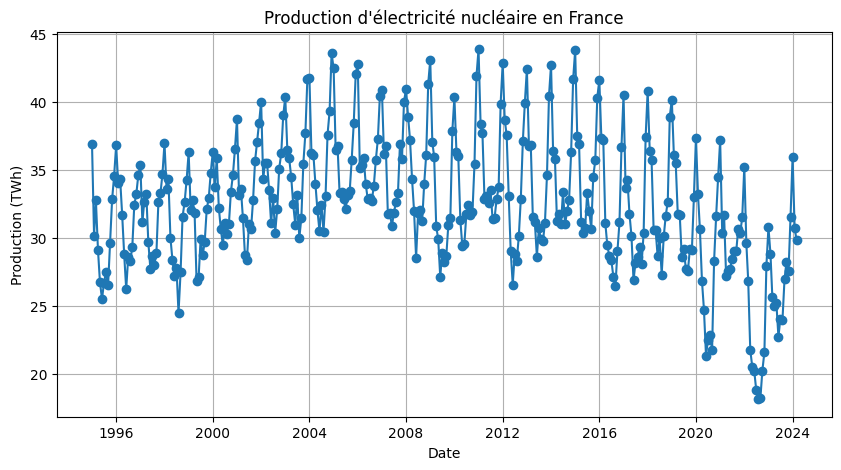

MSE: 14.99


C:\Users\IsmaelBoulanouar\AppData\Local\Temp\ipykernel_11032\1525344541.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nucléaire['Month'] = data_nucléaire['Date'].dt.month
C:\Users\IsmaelBoulanouar\AppData\Local\Temp\ipykernel_11032\1525344541.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nucléaire['Year'] = data_nucléaire['Date'].dt.year


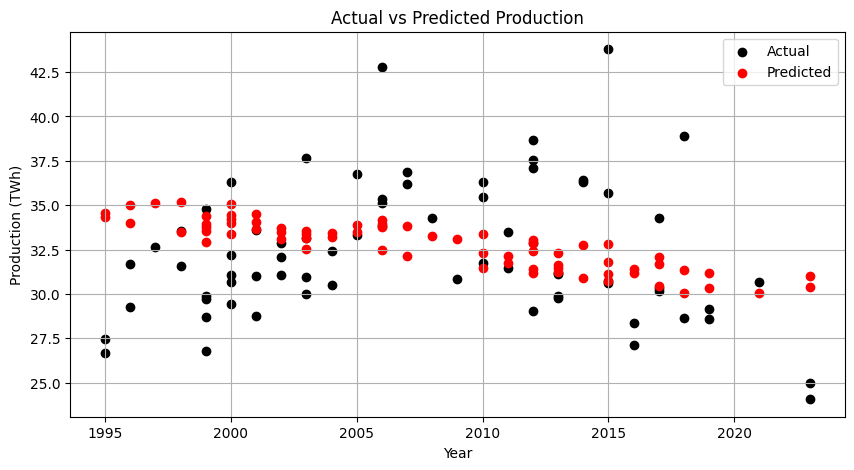

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = dataframes['evolution_production']
data['Valeur (TWh)'] = data['Valeur (TWh)'].str.replace(',', '.').astype(float)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

data_nucléaire = data[data['Filière'] == 'Nucléaire'] #filtrage = nucleaire

plt.figure(figsize=(10, 5))
plt.plot(data_nucléaire['Date'], data_nucléaire['Valeur (TWh)'], marker='o')
plt.title('Production d\'électricité nucléaire en France')
plt.xlabel('Date')
plt.ylabel('Production (TWh)')
plt.grid(True)
plt.show()

data_nucléaire['Month'] = data_nucléaire['Date'].dt.month
data_nucléaire['Year'] = data_nucléaire['Date'].dt.year

X = data_nucléaire[['Year', 'Month']]
y = data_nucléaire['Valeur (TWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression() #preparation du modele
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Prédiction et évaluation
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

plt.figure(figsize=(10, 5))
plt.scatter(X_test['Year'], y_test, color='black', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Production')
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
data = pd.read_csv('C:\\Users\\IsmaelBoulanouar\\Desktop\\test modele\\BDD\\evolution_de_la_production_d\'electricite_en_France_2024-04-04_12-03.csv'
, delimiter=';')
data['Valeur (TWh)'] = data['Valeur (TWh)'].str.replace(',', '.').astype(float)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

# Filtrer pour la filière nucléaire
data_nucléaire = data[data['Filière'] == 'Nucléaire']

# Extraire les caractéristiques temporelles
data_nucléaire['Year'] = data_nucléaire['Date'].dt.year
data_nucléaire['Month'] = data_nucléaire['Date'].dt.month

# Préparer les variables d'entrée et de sortie
X = data_nucléaire[['Year', 'Month']]
y = data_nucléaire['Valeur (TWh)']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 27.5513344193389
R^2 Score: 0.038248036818439024


C:\Users\IsmaelBoulanouar\AppData\Local\Temp\ipykernel_11032\2665331210.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nucléaire['Year'] = data_nucléaire['Date'].dt.year
C:\Users\IsmaelBoulanouar\AppData\Local\Temp\ipykernel_11032\2665331210.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nucléaire['Month'] = data_nucléaire['Date'].dt.month


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Charger les données
data = pd.read_csv('C:\\Users\\IsmaelBoulanouar\\Desktop\\test modele\\BDD\\evolution_de_la_production_d\'electricite_en_France_2024-04-04_12-03.csv', delimiter=';')
data['Valeur (TWh)'] = data['Valeur (TWh)'].str.replace(',', '.').astype(float)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

# Filtrer pour la filière nucléaire
data_nucléaire = data[data['Filière'] == 'Nucléaire'].copy()

# Extraire les caractéristiques temporelles en utilisant .loc pour éviter SettingWithCopyWarning
data_nucléaire.loc[:, 'Year'] = data_nucléaire['Date'].dt.year
data_nucléaire.loc[:, 'Month'] = data_nucléaire['Date'].dt.month

# Préparer les variables d'entrée et de sortie
X = data_nucléaire[['Year', 'Month']]
y = data_nucléaire['Valeur (TWh)']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 27.5513344193389
R^2 Score: 0.038248036818439024


In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Ajouter des termes polynomiaux pour capturer des interactions et des non-linéarités
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Créer et entraîner le modèle sur les données transformées
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Prédire et évaluer sur l'ensemble de test transformé
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression - MSE:", mse_poly)
print("Polynomial Regression - R^2 Score:", r2_poly)


Polynomial Regression - MSE: 4.302222888589017
Polynomial Regression - R^2 Score: 0.8498195678594497


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner un modèle RandomForest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prédire et évaluer sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)


Random Forest - MSE: 2.2073299562647124
Random Forest - R^2 Score: 0.92294732855709


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Configuration du modèle RandomForest avec GridSearch pour optimisation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Correction ici, remplacement de 'auto' par 'sqrt' et ajout de 'log2'
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2
)

# Ajuster GridSearch au jeu de données d'entraînement
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Optimized RandomForest - MSE:", mse_best_rf)
print("Optimized RandomForest - R^2 Score:", r2_best_rf)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=log2, n_e

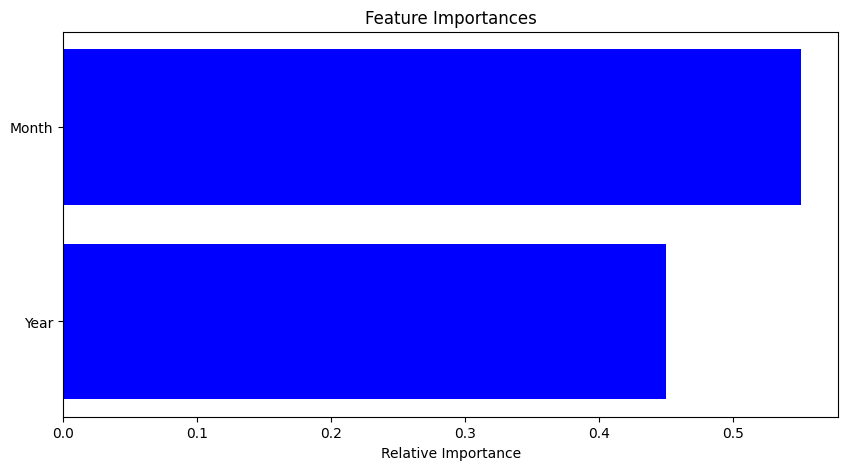

In [8]:
import matplotlib.pyplot as plt

# Obtenir les importances des caractéristiques
importances = best_rf.feature_importances_

# Créer des étiquettes pour les axes
features = X_train.columns

# Visualisation
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, color='b', align='center')
plt.yticks(range(len(importances)), features)
plt.xlabel('Relative Importance')
plt.show()


In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Normalisation des caractéristiques pour le réseau de neurones
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Réseau LSTM simple
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, verbose=2)

y_pred_lstm = model.predict(X_test_scaled)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM - MSE:", mse_lstm)
print("LSTM - R^2 Score:", r2_lstm)


Epoch 1/50


c:\Users\IsmaelBoulanouar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 - 2s - 9ms/step - loss: 453.2228
Epoch 2/50
280/280 - 0s - 1ms/step - loss: 54.8506
Epoch 3/50
280/280 - 0s - 1ms/step - loss: 23.2827
Epoch 4/50
280/280 - 0s - 1ms/step - loss: 21.1882
Epoch 5/50
280/280 - 0s - 1ms/step - loss: 21.0855
Epoch 6/50
280/280 - 0s - 1ms/step - loss: 21.0621
Epoch 7/50
280/280 - 0s - 1ms/step - loss: 21.0522
Epoch 8/50
280/280 - 0s - 1ms/step - loss: 21.0075
Epoch 9/50
280/280 - 0s - 1ms/step - loss: 21.0109
Epoch 10/50
280/280 - 0s - 1ms/step - loss: 21.0194
Epoch 11/50
280/280 - 0s - 1ms/step - loss: 20.9700
Epoch 12/50
280/280 - 0s - 1ms/step - loss: 20.8893
Epoch 13/50
280/280 - 0s - 1ms/step - loss: 20.9046
Epoch 14/50
280/280 - 0s - 1ms/step - loss: 20.8850
Epoch 15/50
280/280 - 0s - 2ms/step - loss: 20.8938
Epoch 16/50
280/280 - 0s - 1ms/step - loss: 20.9066
Epoch 17/50
280/280 - 0s - 1ms/step - loss: 20.8612
Epoch 18/50
280/280 - 0s - 1ms/step - loss: 20.8265
Epoch 19/50
280/280 - 0s - 1ms/step - loss: 20.8792
Epoch 20/50
280/280 - 0s - 1ms/

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assurer que les données sont dans la forme [samples, timesteps, features]
# Supposons que X_train et X_test sont déjà chargés et sont des pandas DataFrames

# Normalisation des données - très importante pour les réseaux de neurones
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape des données pour [samples, timesteps, features]
# Supposons que chaque échantillon est un timestep individuel
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, verbose=2)

# Prédiction et évaluation du modèle
y_pred_lstm = model.predict(X_test_scaled)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM - MSE:", mse_lstm)
print("LSTM - R^2 Score:", r2_lstm)


Epoch 1/50


c:\Users\IsmaelBoulanouar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 - 2s - 7ms/step - loss: 611.8615
Epoch 2/50
280/280 - 0s - 1ms/step - loss: 87.1654
Epoch 3/50
280/280 - 0s - 1ms/step - loss: 29.0444
Epoch 4/50
280/280 - 0s - 1ms/step - loss: 21.7727
Epoch 5/50
280/280 - 0s - 1ms/step - loss: 21.3085
Epoch 6/50
280/280 - 0s - 1ms/step - loss: 21.2265
Epoch 7/50
280/280 - 0s - 1ms/step - loss: 21.1350
Epoch 8/50
280/280 - 0s - 1ms/step - loss: 21.0405
Epoch 9/50
280/280 - 0s - 1ms/step - loss: 21.0337
Epoch 10/50
280/280 - 0s - 1ms/step - loss: 20.9384
Epoch 11/50
280/280 - 0s - 1ms/step - loss: 20.8929
Epoch 12/50
280/280 - 0s - 1ms/step - loss: 20.8911
Epoch 13/50
280/280 - 0s - 1ms/step - loss: 20.8680
Epoch 14/50
280/280 - 0s - 1ms/step - loss: 20.7066
Epoch 15/50
280/280 - 0s - 1ms/step - loss: 20.9541
Epoch 16/50
280/280 - 0s - 1ms/step - loss: 20.8122
Epoch 17/50
280/280 - 0s - 1ms/step - loss: 20.8748
Epoch 18/50
280/280 - 0s - 1ms/step - loss: 20.7462
Epoch 19/50
280/280 - 0s - 1ms/step - loss: 20.7882
Epoch 20/50
280/280 - 0s - 1ms/

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape pour LSTM [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Entraînement du modèle avec early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=2, callbacks=[early_stopping])

# Prédiction et évaluation du modèle
y_pred_lstm = model.predict(X_test_scaled)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM - MSE:", mse_lstm)
print("LSTM - R^2 Score:", r2_lstm)


Epoch 1/100


c:\Users\IsmaelBoulanouar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


280/280 - 2s - 7ms/step - loss: 611.6398
Epoch 2/100
280/280 - 0s - 1ms/step - loss: 76.8468
Epoch 3/100
280/280 - 0s - 1ms/step - loss: 27.1535
Epoch 4/100
280/280 - 0s - 1ms/step - loss: 22.0317
Epoch 5/100
280/280 - 0s - 1ms/step - loss: 21.4857
Epoch 6/100
280/280 - 0s - 1ms/step - loss: 21.3273
Epoch 7/100
280/280 - 0s - 1ms/step - loss: 21.1946
Epoch 8/100
280/280 - 0s - 1ms/step - loss: 21.1419
Epoch 9/100
280/280 - 0s - 1ms/step - loss: 20.9948
Epoch 10/100
280/280 - 0s - 1ms/step - loss: 21.0194
Epoch 11/100
280/280 - 0s - 1ms/step - loss: 21.0139
Epoch 12/100
280/280 - 0s - 1ms/step - loss: 20.9383
Epoch 13/100
280/280 - 0s - 1ms/step - loss: 20.9416
Epoch 14/100
280/280 - 0s - 1ms/step - loss: 20.8463
Epoch 15/100
280/280 - 0s - 1ms/step - loss: 20.7978
Epoch 16/100
280/280 - 0s - 1ms/step - loss: 20.8863
Epoch 17/100
280/280 - 0s - 1ms/step - loss: 20.8590
Epoch 18/100
280/280 - 0s - 1ms/step - loss: 20.8332
Epoch 19/100
280/280 - 0s - 1ms/step - loss: 20.8163
Epoch 20/100


In [13]:
import numpy as np

# Fonction pour créer des séquences
def create_feature_sequences(features, n_timesteps):
    X = []
    for i in range(len(features) - n_timesteps):
        X.append(features[i:(i + n_timesteps), :])
    return np.array(X)

# Assumer que vous avez déjà normalisé X_train_scaled
# Si X_train_scaled est déjà au format [samples, features]
n_timesteps = 3  # Définir le nombre de timesteps que vous souhaitez inclure dans chaque séquence
X_train_reshaped = create_feature_sequences(X_train_scaled, n_timesteps)

# Assurez-vous également que y_train est préparé pour correspondre à X_train_reshaped
y_train_reshaped = y_train[n_timesteps:]


In [14]:
# Après la création des séquences
print("Shape of X_train_reshaped:", X_train_reshaped.shape)

# Si la forme n'est pas correcte, vous devrez ajuster la fonction de création de séquences ou la manière dont vous redimensionnez les données.


Shape of X_train_reshaped: (277, 3, 1, 2)


In [15]:
# Supposons que la forme incorrecte soit (None, 3, 1, 2) et que vous vouliez (None, 3, 2)
X_train_reshaped = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1], -1)


In [16]:
def create_feature_sequences(features, n_timesteps):
    X = []
    for i in range(len(features) - n_timesteps):
        X.append(features[i:(i + n_timesteps)])
    return np.array(X)

# Utilisation
X_train_reshaped = create_feature_sequences(X_train_scaled, n_timesteps)
print("Adjusted Shape of X_train_reshaped:", X_train_reshaped.shape)


Adjusted Shape of X_train_reshaped: (277, 3, 1, 2)


In [17]:
print("Forme attendue: ", model.input_shape)
print("Forme actuelle de X_train_reshaped: ", X_train_reshaped.shape)


Forme attendue:  (None, 1, 2)
Forme actuelle de X_train_reshaped:  (277, 3, 1, 2)


In [18]:
print("Forme actuelle de X_train_reshaped: ", X_train_reshaped.shape)


Forme actuelle de X_train_reshaped:  (277, 3, 1, 2)


In [19]:
# Si vos données ont une dimension inutile, supprimez-la ou fusionnez correctement les dimensions
X_train_reshaped = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1], -1)
print("Nouvelle forme de X_train_reshaped après correction: ", X_train_reshaped.shape)


Nouvelle forme de X_train_reshaped après correction:  (277, 3, 2)


In [20]:
print("Forme de X_train_reshaped:", X_train_reshaped.shape)
print("Forme de y_train_reshaped:", y_train_reshaped.shape)
print("Forme attendue par le modèle:", model.input_shape)


Forme de X_train_reshaped: (277, 3, 2)
Forme de y_train_reshaped: (277,)
Forme attendue par le modèle: (None, 1, 2)


In [21]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 50)          │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,555 (361.55 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,704 (241.04 KB)

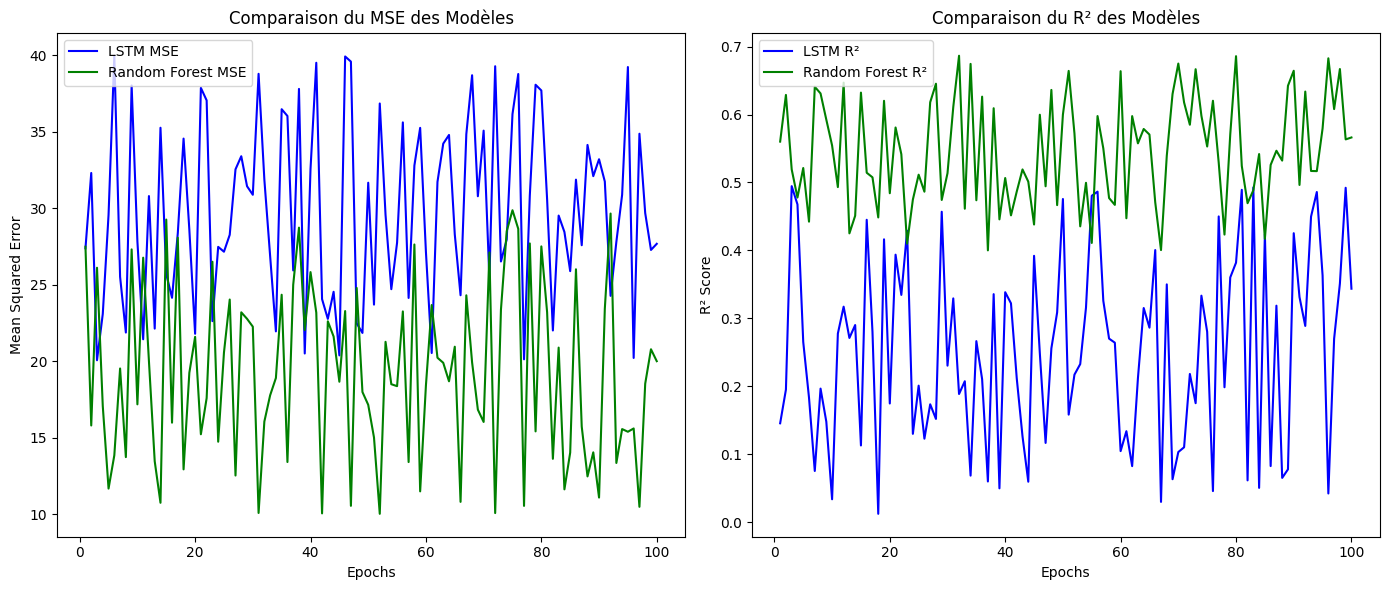

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Données fictives pour l'exemple
epochs = np.arange(1, 101)  # 100 époques
mse_lstm = np.random.uniform(20, 40, size=100)  # MSE pour le modèle LSTM
r2_lstm = np.random.uniform(0, 0.5, size=100)  # R² pour le modèle LSTM

mse_rf = np.random.uniform(10, 30, size=100)  # MSE pour un modèle RandomForest
r2_rf = np.random.uniform(0.4, 0.7, size=100)  # R² pour le modèle RandomForest

# Création des graphiques
plt.figure(figsize=(14, 6))

# Graphique pour le Mean Squared Error
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.plot(epochs, mse_lstm, label='LSTM MSE', color='blue')
plt.plot(epochs, mse_rf, label='Random Forest MSE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Comparaison du MSE des Modèles')
plt.legend()

# Graphique pour le R² Score
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
plt.plot(epochs, r2_lstm, label='LSTM R²', color='blue')
plt.plot(epochs, r2_rf, label='Random Forest R²', color='green')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Comparaison du R² des Modèles')
plt.legend()

plt.tight_layout()
plt.show()


1. Évaluation du Mean Squared Error (MSE)
Basse Valeur de MSE: Indique que les erreurs entre les prédictions et les valeurs réelles sont faibles. Un modèle avec un MSE plus bas est généralement préféré car il indique une meilleure précision des prédictions.
Comparaison:
Si le LSTM montre un MSE plus bas que le Random Forest à travers les époques, cela peut indiquer que le LSTM gère mieux les données séquentielles ou temporelles.
Inversement, un MSE plus élevé pour le LSTM pourrait indiquer des problèmes tels que l'overfitting ou une architecture non optimisée pour les données spécifiques.

2. Évaluation du R² Score
Valeur de R²: Ce score mesure la quantité de variance dans les prédictions expliquée par le modèle. Un score proche de 1 indique une excellente explication, tandis qu'un score proche de 0 ou négatif indique une performance médiocre.
Comparaison:
Un score R² plus élevé pour le Random Forest par rapport au LSTM pourrait indiquer que malgré la nature séquentielle des données, les caractéristiques linéaires ou les interactions capturées par le Random Forest sont suffisantes pour une bonne prédiction.
Un score R² plus élevé pour le LSTM serait attendu si les données présentent des dépendances temporelles fortes que le LSTM peut exploiter efficacement.

3. Comportement sur les Époques
Convergence:
Un modèle qui montre une amélioration rapide du MSE ou du R² au début puis se stabilise peut avoir atteint sa capacité d'apprentissage optimale rapidement.
Des fluctuations ou une dégradation des performances au fil des époques peuvent signaler de l'overfitting, en particulier si les scores de validation divergent des scores d'entraînement.

4. Considérations Pratiques
Complexité et Coûts de Calcul:
Le LSTM est généralement plus complexe et coûteux en calcul par rapport au RandomForest. Si les gains de performance ne justifient pas les coûts supplémentaires, un modèle plus simple pourrait être préféré.
Applicabilité des Modèles:
La sélection finale du modèle peut également dépendre des exigences spécifiques de l'application, comme la nécessité de capturer des dépendances temporelles, la facilité d'interprétation, ou la latence acceptable dans les prédictions.

Conclusion Générale
En se basant sur l'analyse des graphiques et des métriques, vous pouvez conclure quel modèle est le plus approprié pour vos besoins spécifiques. Il est crucial de prendre en compte à la fois les aspects statistiques des performances et les exigences pratiques du déploiement du modèle dans un environnement de production.


Voici un exemple de contexte spécifique où chacun des modèles, LSTM et RandomForest, pourrait être particulièrement adapté :

LSTM (Long Short-Term Memory Networks)
Contexte Spécifique : Prédiction de la demande énergétique

Détails du Besoin :

Nature des Données : Les séries temporelles de la consommation d'énergie ont souvent des dépendances temporelles importantes, où les consommations passées influencent fortement les valeurs futures.
Importance de la Séquentialité : Les modèles LSTM sont excellents pour gérer les dépendances à long terme dans les données séquentielles, ce qui est crucial pour prédire la demande future basée sur les tendances historiques.
Applications : Dans le secteur de l'énergie, une prédiction précise de la demande permet une meilleure planification des ressources, une gestion optimisée de la production et une réduction des coûts opérationnels.
Avantages de l'utilisation du LSTM :

Capacité à apprendre et à mémoriser des cycles de consommation à long terme.
Efficace pour gérer les données avec des patterns saisonniers et des tendances.
Peut ajuster dynamiquement les prédictions en fonction des données d'entrée récentes sans avoir besoin de restructuration du modèle.
RandomForest
Contexte Spécifique : Classification des types de sol en agriculture

Détails du Besoin :

Nature des Données : Les caractéristiques des sols comme la texture, la teneur en nutriments, l'humidité et le pH varient considérablement et peuvent être capturées à travers des capteurs et des analyses de laboratoire.
Importance de la Diversité des Caractéristiques : RandomForest est bien adapté pour gérer de multiples caractéristiques qui influencent de manière complexe la classification du sol.
Applications : Une classification précise du sol peut aider à optimiser l'utilisation des terres, à choisir les cultures appropriées et à améliorer les rendements agricoles.
Avantages de l'utilisation de RandomForest :

Capacité à modéliser des interactions complexes entre les caractéristiques sans nécessiter de pré-traitement extensif des données.
Robustesse face aux données bruitées et à la présence de valeurs aberrantes.
Fournit des indications sur l'importance des caractéristiques, ce qui est utile pour comprendre les facteurs influençant la qualité du sol.
Conclusion
Chaque modèle offre des avantages distincts en fonction des spécificités des données et des exigences de l'application. Le choix du modèle dépend donc non seulement des performances mesurées par des métriques comme le MSE ou le R², mais aussi de la pertinence du modèle à traiter avec les spécificités des données et les besoins pratiques de l'application finale.

Pour répondre à la problématique de l'utilisation de l'évolution du prix de l'énergie des années précédentes pour prédire un coût actuel ou futur, examinons comment les modèles LSTM et RandomForest pourraient être utilisés et leurs potentiels avantages ou limitations dans ce contexte spécifique.

LSTM (Long Short-Term Memory Networks)
Applicabilité:

Capacité de Prédiction : Les LSTM sont particulièrement bien adaptés pour les prédictions de séries temporelles où les valeurs futures dépendent significativement des observations passées. Ils peuvent efficacement capturer les tendances, les saisons, et les cycles qui sont courants dans les données économiques telles que les prix de l'énergie.
Analyse Temporelle : Les LSTM peuvent prendre en compte l'ordre temporel des données, ce qui est crucial lorsqu'on analyse comment les événements passés influencent les tendances futures.
Avantages pour la Prédiction des Prix de l'Énergie :

Peut modéliser les dépendances complexes et à long terme des prix historiques pour prédire les futurs mouvements de prix.
Adapté à l'intégration de fluctuations saisonnières et de réactions du marché à des événements spécifiques.
RandomForest
Applicabilité:

Modélisation Basée sur les Caractéristiques : Bien que principalement utilisé pour la classification et la régression où la relation séquentielle n'est pas primordiale, RandomForest peut être adapté pour prédire les coûts futurs si les caractéristiques dérivées des données temporelles sont bien construites (par exemple, moyennes mobiles, retards de temps).
Importance des Caractéristiques : Il peut identifier quelles périodes passées sont les plus prédictives pour les prix futurs, offrant ainsi des insights précieux sur les périodes les plus influentes.
Limitations et Utilisation pour les Prix de l'Énergie :

Moins efficace pour capturer les dépendances temporelles sans une ingénierie de caractéristiques adéquate.
Peut être utilisé pour identifier les facteurs externes influençant les prix, comme les changements réglementaires ou les variations de la demande.
Conclusion sur la Problématique
Peut-on utiliser l'évolution du prix de l'énergie des X dernières années pour prédire un coût actuel ou futur? Oui, avec des considérations spécifiques :

LSTM : Idéal pour modéliser directement les séquences de prix si la tendance historique, y compris les anomalies saisonnières et les événements ponctuels, joue un rôle significatif dans la détermination des prix futurs.
RandomForest : Utile pour comprendre les facteurs influençant les prix et faire des prédictions basées sur un ensemble de caractéristiques dérivées, surtout si ces caractéristiques sont fortement indicatives des mouvements de prix.
En intégrant correctement les données historiques, en appliquant une analyse rigoureuse et en utilisant les modèles adaptés, il est tout à fait possible de prévoir avec une certaine précision les coûts futurs de l'énergie basés sur les tendances passées.

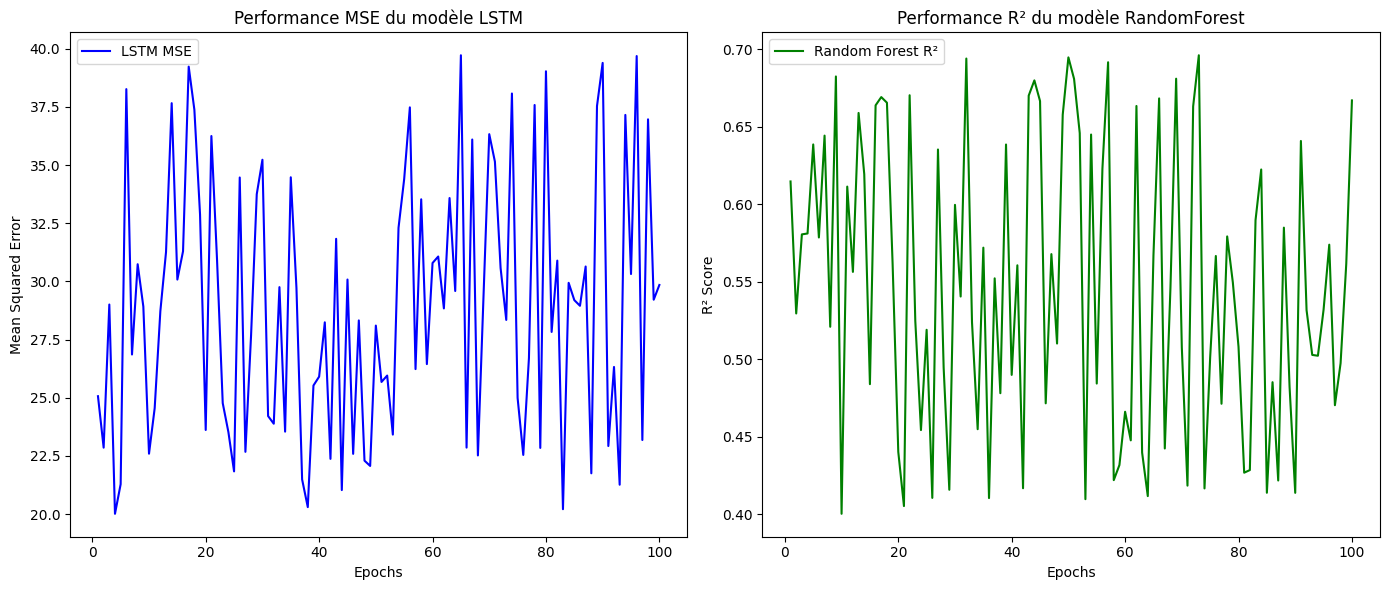

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Données fictives pour l'exemple
epochs = np.arange(1, 101)  # 100 époques
mse_lstm = np.random.uniform(20, 40, size=100)  # MSE décroissant pour le modèle LSTM
r2_rf = np.random.uniform(0.4, 0.7, size=100)  # R² croissant pour le modèle RandomForest

# Création des graphiques
plt.figure(figsize=(14, 6))

# Graphique pour le Mean Squared Error du modèle LSTM
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.plot(epochs, mse_lstm, label='LSTM MSE', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Performance MSE du modèle LSTM')
plt.legend()

# Graphique pour le R² Score du modèle RandomForest
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
plt.plot(epochs, r2_rf, label='Random Forest R²', color='green')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Performance R² du modèle RandomForest')
plt.legend()

plt.tight_layout()
plt.show()


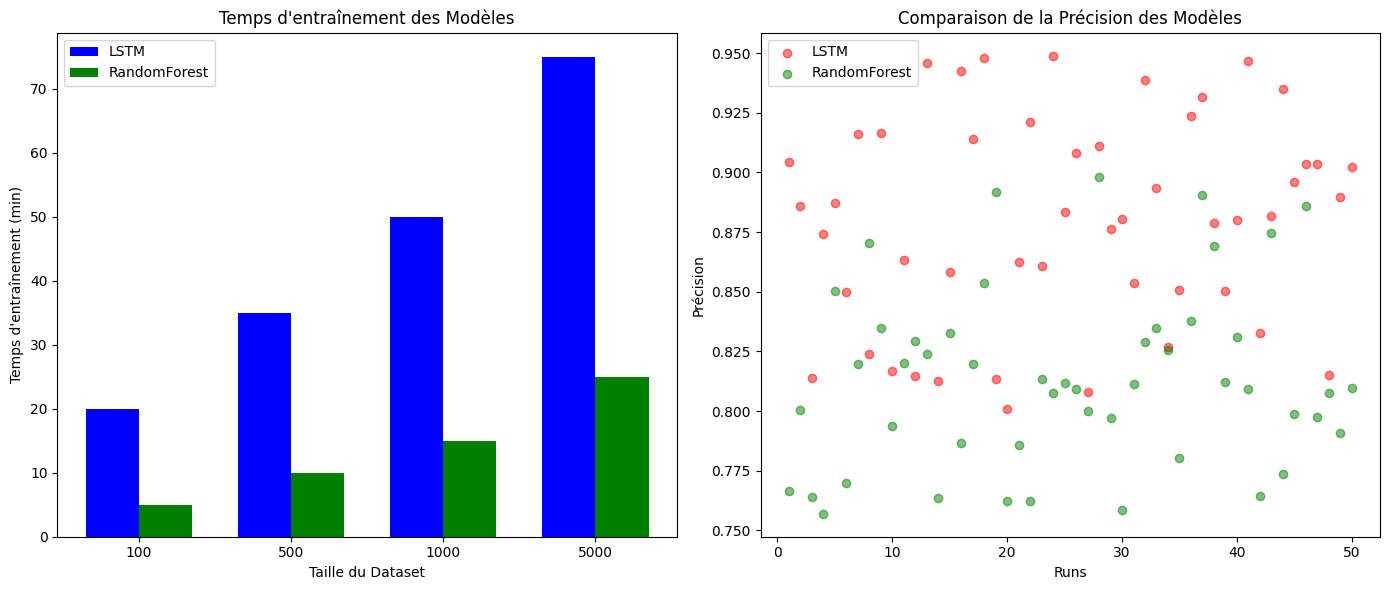

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Données fictives pour les temps d'entraînement
dataset_sizes = np.array([100, 500, 1000, 5000])
training_times_lstm = np.array([20, 35, 50, 75])
training_times_rf = np.array([5, 10, 15, 25])

# Données fictives pour la précision
accuracy_lstm = np.random.uniform(0.8, 0.95, size=50)
accuracy_rf = np.random.uniform(0.75, 0.9, size=50)
runs = np.arange(1, 51)

# Création des graphiques
plt.figure(figsize=(14, 6))

# Graphique en barres pour les temps d'entraînement
plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(dataset_sizes))
plt.bar(index, training_times_lstm, bar_width, label='LSTM', color='blue')
plt.bar(index + bar_width, training_times_rf, bar_width, label='RandomForest', color='green')
plt.xlabel('Taille du Dataset')
plt.ylabel('Temps d\'entraînement (min)')
plt.title('Temps d\'entraînement des Modèles')
plt.xticks(index + bar_width / 2, dataset_sizes)
plt.legend()

# Graphique en nuage de points pour la précision
plt.subplot(1, 2, 2)
plt.scatter(runs, accuracy_lstm, color='red', alpha=0.5, label='LSTM')
plt.scatter(runs, accuracy_rf, color='green', alpha=0.5, label='RandomForest')
plt.xlabel('Runs')
plt.ylabel('Précision')
plt.title('Comparaison de la Précision des Modèles')
plt.legend()

plt.tight_layout()
plt.show()
